# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
# load the dataset
df_org = pd.read_csv("breast-cancer-wisconsin-data.csv")

print(df_org.shape)
df_org.head()

(699, 11)


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
df_bc = df_org.drop(labels="ID",axis=1) # drop ID as not require for analysis

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
df_bc.shape

(699, 10)

In [6]:
df_bc.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [7]:
# find any "?" and replace with nan for processing
df_bc = df_bc.replace('?',np.nan)

In [8]:
# convert Bare Nuclei into numerial
df_bc["Bare Nuclei"] = df_bc["Bare Nuclei"].astype("float64")

In [9]:
# Analyse the data distribution of each columns
df_bc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


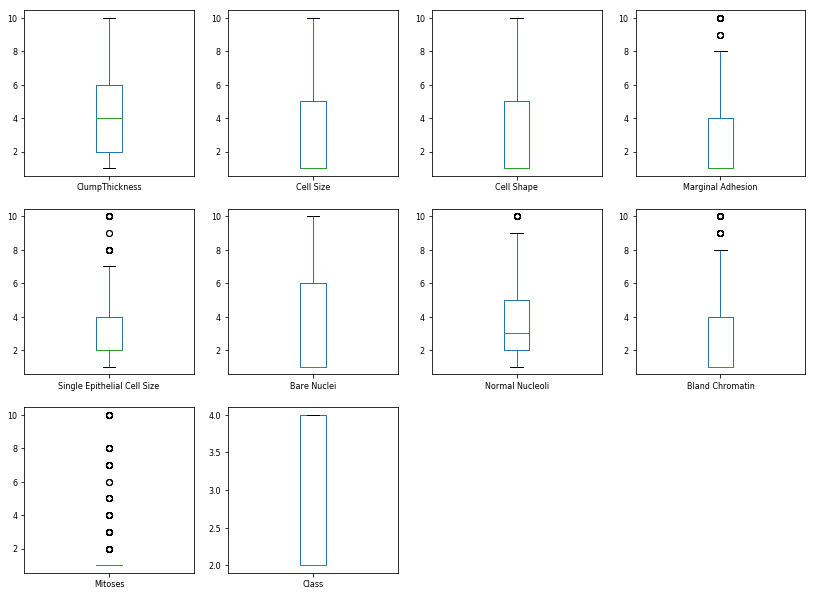

In [10]:
# box and whisker plots
df_bc.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

In [11]:
# Few attributes have outliers: Single Epithelial Cell Size, Mtoses, bland chromatin, Normal Nucleoli, Marginal Adhesion

In [12]:
# analyse the target data distribution
df_bc["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [13]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [14]:
df_bc.isnull().sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [15]:
# droppin the na values as it is of very small percentage comparing to entire dataset
df_bc = df_bc.dropna()

In [16]:
df_bc.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [17]:
# final check for missing values if any
df_bc.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [18]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

In [19]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [20]:
# values are treated already

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [21]:
# Check for correlation of variable

In [22]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [23]:
#Let us check for pair plots

In [24]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

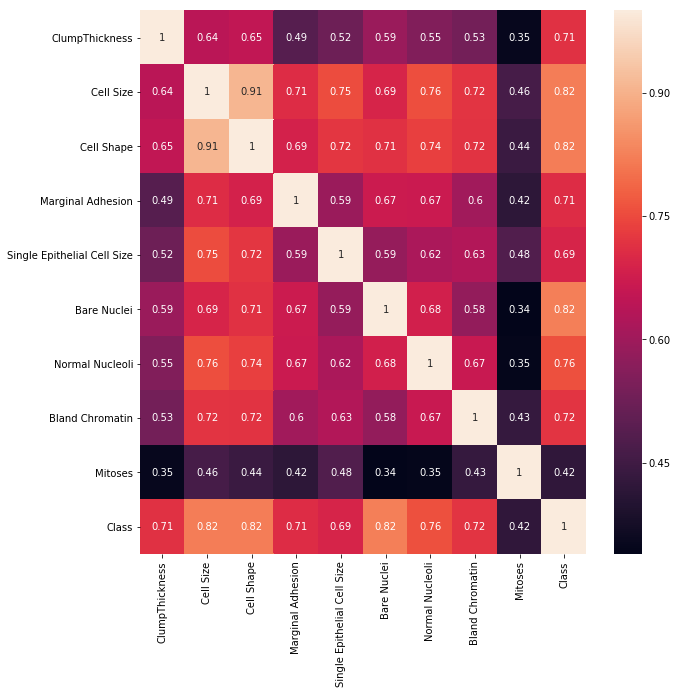

In [25]:
corrmat = df_bc.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, annot=True)

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\numpy\core\fromnumer

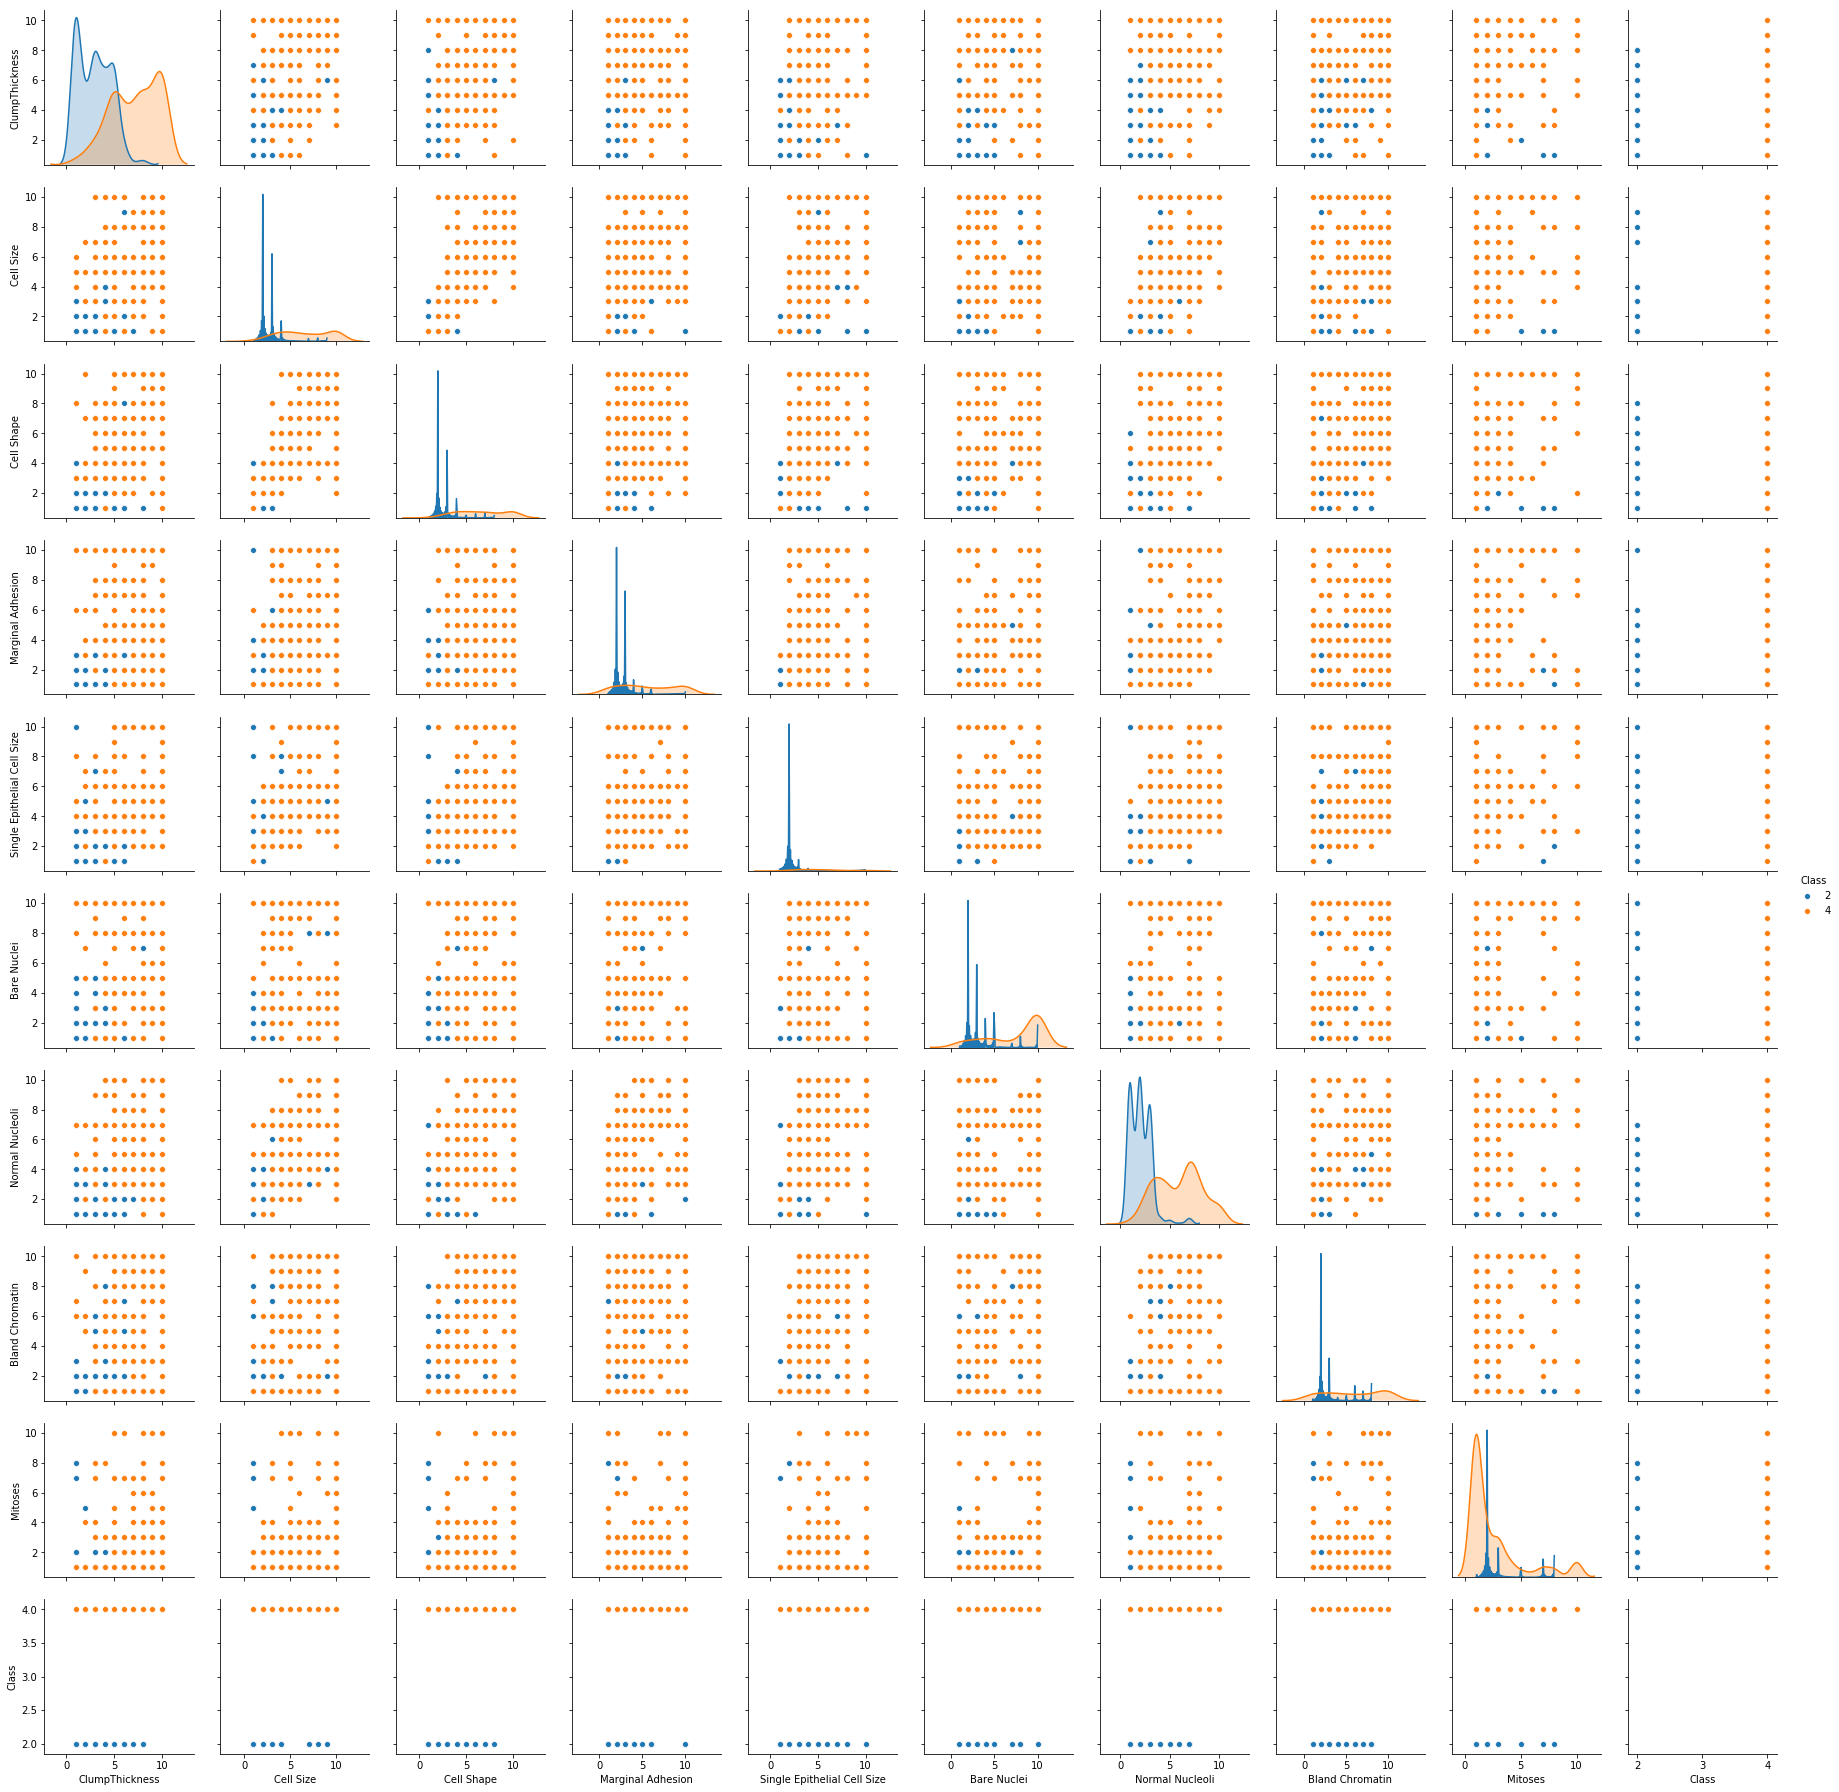

In [26]:
sns.pairplot(df_bc, diag_kind='kde', hue='Class')   # to plot density curve instead of histogram

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [27]:
# We could see most of the outliers are now removed.

In [28]:
df_bc_tmp = df_bc.copy()  # make copy of orignal dataframe

# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)
def treat_upper_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df[colname] = df[colname].apply(lambda x: ub if x > ub else x)
    
# outlier treatment
#treat_upper_outliers(df_bc_treated, "Mitoses")
treat_upper_outliers(df_bc_tmp, "Bland Chromatin")
treat_upper_outliers(df_bc_tmp, "Normal Nucleoli")
treat_upper_outliers(df_bc_tmp, "Marginal Adhesion")
treat_upper_outliers(df_bc_tmp, "Single Epithelial Cell Size")

In [29]:
# Mitoses is have low correlation with target < 0.5 , so removing it
df_bc_treated = df_bc_tmp.drop(labels="Mitoses",axis=1) # drop ID as not require for analysis

In [30]:
# standardize variables
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_bc_scaled = scaler.fit_transform(df_bc_treated)

In [31]:
df_bc_treated.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Class'],
      dtype='object')

# Q6 Create a covariance matrix for identifying Principal components

In [32]:
# PCA
# Step 1 - Create covariance matrix

In [33]:
train_cov_matrix = np.cov(df_bc_scaled.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[1.00146628 0.64342355 0.65442815 0.50216685 0.55382694 0.59396107
  0.55757321 0.54523331 0.71583801]
 [0.64342355 1.00146628 0.90855848 0.72223322 0.78877623 0.69272299
  0.75699482 0.72400053 0.82200496]
 [0.65442815 0.90855848 1.00146628 0.6991297  0.76039892 0.71492429
  0.73687465 0.72198786 0.82309607]
 [0.50216685 0.72223322 0.6991297  1.00146628 0.65216563 0.68468575
  0.68425849 0.62539181 0.72457099]
 [0.55382694 0.78877623 0.76039892 0.65216563 1.00146628 0.63435226
  0.66063359 0.68534666 0.74155495]
 [0.59396107 0.69272299 0.71492429 0.68468575 0.63435226 1.00146628
  0.68609983 0.60260148 0.82390217]
 [0.55757321 0.75699482 0.73687465 0.68425849 0.66063359 0.68609983
  1.00146628 0.6730806  0.76303573]
 [0.54523331 0.72400053 0.72198786 0.62539181 0.68534666 0.60260148
  0.6730806  1.00146628 0.73179189]
 [0.71583801 0.82200496 0.82309607 0.72457099 0.74155495 0.82390217
  0.76303573 0.73179189 1.00146628]]


# Q7 Identify eigen values and eigen vector

In [34]:
# Step 2- Get eigen values and eigen vector

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.28985852  0.8510479   0.01780541  0.16753192 -0.10693496 -0.19735522
  -0.02285456 -0.32558818  0.08000855]
 [ 0.3592095  -0.07685646  0.73899605 -0.00589724 -0.2214586   0.36869254
   0.27156192  0.04569736  0.2410383 ]
 [ 0.35718138 -0.01118023 -0.64835709  0.17718866 -0.19261392  0.53272064
   0.23492186  0.11220472  0.17850529]
 [ 0.31891228 -0.34641179 -0.05064291  0.01050833  0.42498922 -0.03920563
   0.16523561 -0.75207606 -0.02333612]
 [ 0.32882754 -0.20693392 -0.0750047   0.05596684 -0.3730587  -0.61673944
   0.46252395  0.17216404 -0.27781941]
 [ 0.32611251  0.10427684  0.11744714  0.38858698  0.59731564  0.07796664
  -0.03530527  0.42636245 -0.41483384]
 [ 0.33078855 -0.17816085 -0.05132473  0.07054823  0.16187837 -0.37565374
  -0.36775534  0.2352389   0.70237077]
 [ 0.31961206 -0.20523962  0.03582746  0.1140341  -0.42218202  0.10095575
  -0.69914383 -0.1565973  -0.37374178]
 [ 0.36279078  0.14874315 -0.08543311 -0.8765153   0.1463011   0.04510253
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [36]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

In [37]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. cumulative reaching almost 100%

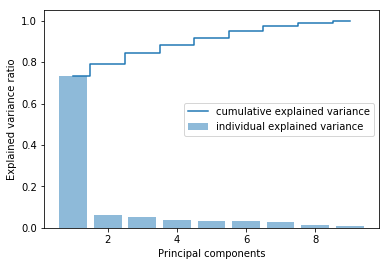

In [38]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [39]:
 #as per cumulative plot, we can see that only 6 PCA are contributing more to the information

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [40]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:6])   # Reducing from 9 to 6 dimension space

X_std_6D = np.dot(df_bc_scaled,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_6D)  # converting array to dataframe for pairplot

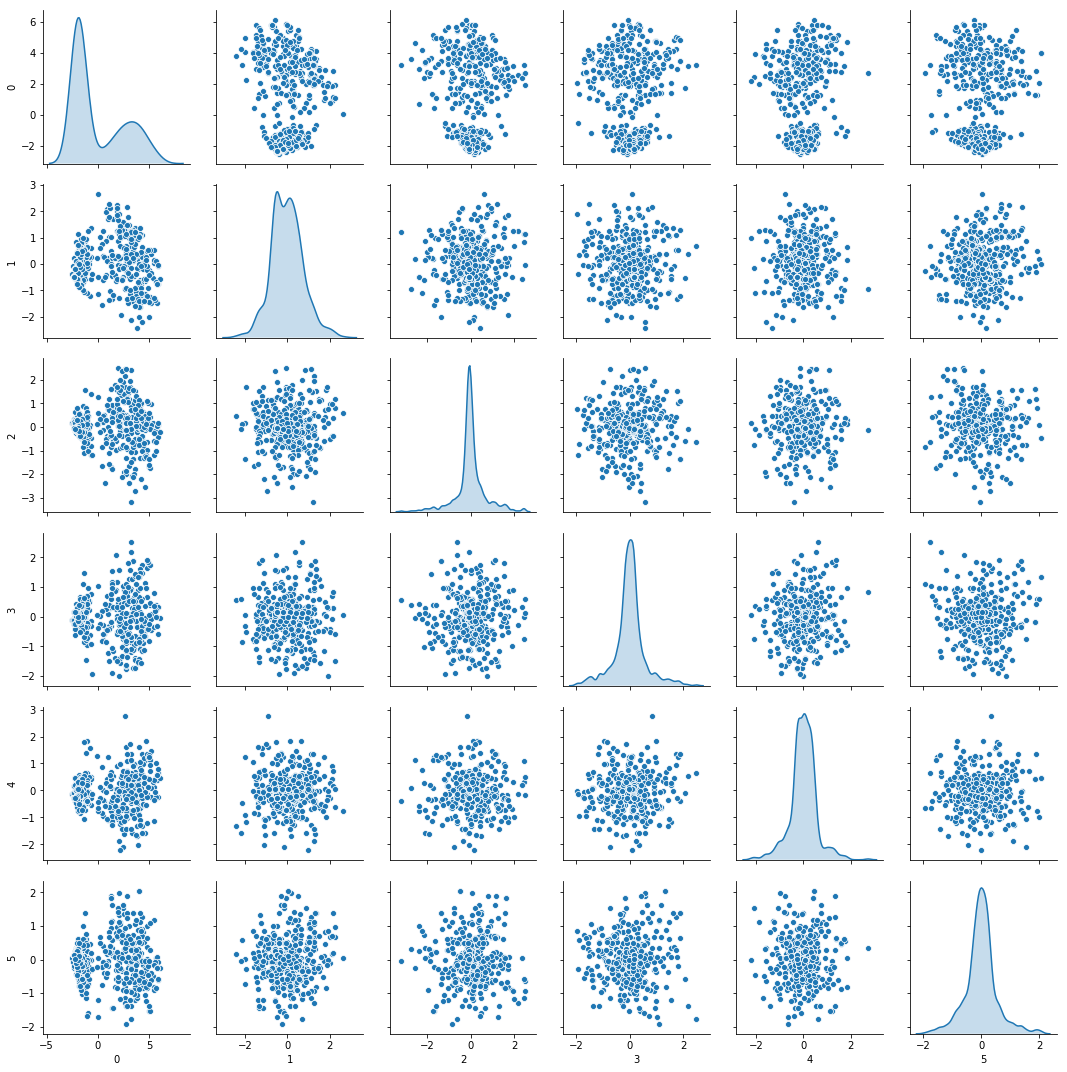

In [41]:
sns.pairplot(Proj_data_df, diag_kind='kde') 

# Q10 Find correlation between components and features

In [42]:
data = pd.DataFrame(eigenvectors[0:6], columns=df_bc_treated.columns)
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Class
0,0.289859,0.851048,0.017805,0.167532,-0.106935,-0.197355,-0.022855,-0.325588,0.080009
1,0.359209,-0.076856,0.738996,-0.005897,-0.221459,0.368693,0.271562,0.045697,0.241038
2,0.357181,-0.011180,-0.648357,0.177189,-0.192614,0.532721,0.234922,0.112205,0.178505
3,0.318912,-0.346412,-0.050643,0.010508,0.424989,-0.039206,0.165236,-0.752076,-0.023336
4,0.328828,-0.206934,-0.075005,0.055967,-0.373059,-0.616739,0.462524,0.172164,-0.277819


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [43]:
# pls note that dataset doest not have any header 
df_jokes = pd.read_csv("jokes.csv")

print(df_jokes.shape)
df_jokes.head()

(24983, 101)


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [44]:
ratings = df_jokes.iloc[0:200,1:]

NumJokes = df_jokes["NumJokes"].iloc[0:200]
print(ratings.shape)
ratings.head()

(200, 100)


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [45]:
ratings.columns = range(0,100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [46]:
ratings = ratings.replace(99.00,0)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [47]:
scaler = StandardScaler()
ratings_diff = scaler.fit_transform(ratings)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [48]:
df_mean = pd.DataFrame(ratings_diff).mean(axis=0)
mean_df_sorted = df_mean.sort_values(ascending=False)
mean_df_sorted.head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64